In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_excel('zomato_train.xlsx')

In [74]:
df.head()

url  \
0  https://www.zomato.com/bangalore/al-swaad-take...   
1  https://www.zomato.com/bangalore/the-boozy-gri...   
2  https://www.zomato.com/bangalore/barkat-btm-ba...   
3  https://www.zomato.com/bangalore/sriracha-lave...   
4  https://www.zomato.com/bangalore/sri-ganesh-ju...   

                                             address  \
0  18, Masjid Street, Opp Akbari Masjid Neelasand...   
1  2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...   
2  28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...   
3  204, 2nd Level, 4th Floor, Comet Block, UB Cit...   
4  513, Opposite Ganesh Temple, Koramangala 8th B...   

                        name online_order book_table  votes  \
0         Al Swaad Take Away          Yes         No     13   
1          The Boozy Griffin           No        Yes   5015   
2                     Barkat           No         No      6   
3                   Sriracha           No         No    699   
4  Sri Ganesh Juice Junction          Yes         No    129   

                            phone               location           rest_type  \
0  +91 7019942388\n+91 9902335220          Richmond Road         Quick Bites   
1                    080 33512954  Koramangala 5th Block  Casual Dining, Pub   
2                  +91 9019670836                    BTM         Quick Bites   
3  +91 8041755366\n+91 7022422473           Lavelle Road       Casual Dining   
4                  +91 9845623889  Koramangala 8th Block       Beverage Shop   

                                          dish_liked  \
0                                                NaN   
1  Cocktails, Craft Beer, Salads, Devils Chicken,...   
2                                                NaN   
3  Noodles, Laksa, Cocktails, Dumplings, Sangria,...   
4                                                NaN   

                                  cuisines approx_cost(for two people)  \
0      North Indian, South Indian, Arabian                         350   
1                    European, Continental                       1,800   
2                                   Kerala                         250   
3  Thai, Chinese, Indonesian, Asian, Momos                       1,500   
4                        Juices, Fast Food                         150   

                                        reviews_list  \
0  [('Rated 1.0', 'RATED\n  If U need reasonable ...   
1  [('Rated 5.0', 'RATED\n  Really great ambience...   
2                                                 []   
3  [('Rated 3.0', 'RATED\n  Another restaurant in...   
4  [('Rated 4.0', 'RATED\n  Good cafe with most v...   

                                           menu_item listed_in(type)  \
0  ['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...        Delivery   
1                                                 []        Dine-out   
2                                                 []        Dine-out   
3                                                 []        Dine-out   
4  ['Dry Fruit Milkshake', 'Wheat Grass with Wate...        Delivery   

         listed_in(city) rates  
0         Residency Road  3.1   
1  Koramangala 6th Block  4.6   
2  Koramangala 4th Block  3.4   
3         Residency Road  4.3   
4  Koramangala 6th Block  3.7

In [75]:
# getting insights of the data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          41373 non-null  object
 1   address                      41373 non-null  object
 2   name                         41373 non-null  object
 3   online_order                 41373 non-null  object
 4   book_table                   41373 non-null  object
 5   votes                        41373 non-null  int64 
 6   phone                        40402 non-null  object
 7   location                     41358 non-null  object
 8   rest_type                    41198 non-null  object
 9   dish_liked                   18901 non-null  object
 10  cuisines                     41341 non-null  object
 11  approx_cost(for two people)  41094 non-null  object
 12  reviews_list                 41373 non-null  object
 13  menu_item                    41

In [76]:
# deleting unnecessary data
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']

In [77]:
# rate feature
df['rates'].value_counts()

3.9     1687
3.8     1622
3.7     1614
3.9     1497
3.8     1476
        ... 
2.2        7
2.0        7
2.0        3
1.8        2
1.8        2
Name: rates, Length: 63, dtype: int64

In [78]:
df['rates'].isnull().sum()

7981

In [79]:
# Removing '/5' from rate column
df['rates'] = df['rates'].apply(lambda x: str(x).split('/')[0])

In [80]:
# renaming features 
df = df.rename(columns = {"approx_cost(for two people)" : "avg_cost", "listed_in(type)" : "meal_type", 
                   "listed_in(city)" : "city"})


In [81]:
df.head()

name online_order book_table  votes  \
0         Al Swaad Take Away          Yes         No     13   
1          The Boozy Griffin           No        Yes   5015   
2                     Barkat           No         No      6   
3                   Sriracha           No         No    699   
4  Sri Ganesh Juice Junction          Yes         No    129   

                location           rest_type  \
0          Richmond Road         Quick Bites   
1  Koramangala 5th Block  Casual Dining, Pub   
2                    BTM         Quick Bites   
3           Lavelle Road       Casual Dining   
4  Koramangala 8th Block       Beverage Shop   

                                          dish_liked  \
0                                                NaN   
1  Cocktails, Craft Beer, Salads, Devils Chicken,...   
2                                                NaN   
3  Noodles, Laksa, Cocktails, Dumplings, Sangria,...   
4                                                NaN   

                                  cuisines avg_cost meal_type  \
0      North Indian, South Indian, Arabian      350  Delivery   
1                    European, Continental    1,800  Dine-out   
2                                   Kerala      250  Dine-out   
3  Thai, Chinese, Indonesian, Asian, Momos    1,500  Dine-out   
4                        Juices, Fast Food      150  Delivery   

                    city rates  
0         Residency Road  3.1   
1  Koramangala 6th Block  4.6   
2  Koramangala 4th Block  3.4   
3         Residency Road  4.3   
4  Koramangala 6th Block  3.7

In [82]:
df.tail()

name online_order book_table  votes        location  \
41368                Koshy's           No         No   2332  St. Marks Road   
41369       Midnight Special          Yes         No      0             HSR   
41370  Sholay - The Barbeque          Yes        Yes     45    New BEL Road   
41371         Ghar Ka Bhojan           No         No      7          Domlur   
41372             Sree Sagar          Yes         No      0    Banashankari   

                rest_type                                         dish_liked  \
41368       Casual Dining  Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...   
41369  Takeaway, Delivery                                                NaN   
41370       Casual Dining                                                NaN   
41371            Delivery                                                NaN   
41372         Quick Bites                                                NaN   

                                             cuisines avg_cost meal_type  \
41368  South Indian, North Indian, Chinese, Beverages      700  Dine-out   
41369                North Indian, Fast Food, Chinese      500  Delivery   
41370                               North Indian, BBQ    1,200  Dine-out   
41371                      North Indian, Healthy Food      200  Delivery   
41372                                    South Indian      200  Dine-out   

                        city rates  
41368         Residency Road  3.8   
41369  Koramangala 4th Block   nan  
41370           New BEL Road  3.5   
41371                MG Road  3.3   
41372           Basavanagudi   nan

In [83]:
df['rates'].notnull().sum()

41373

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          41373 non-null  object
 1   online_order  41373 non-null  object
 2   book_table    41373 non-null  object
 3   votes         41373 non-null  int64 
 4   location      41358 non-null  object
 5   rest_type     41198 non-null  object
 6   dish_liked    18901 non-null  object
 7   cuisines      41341 non-null  object
 8   avg_cost      41094 non-null  object
 9   meal_type     41373 non-null  object
 10  city          41373 non-null  object
 11  rates         41373 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.8+ MB


In [85]:
import pandas_profiling 

In [86]:
pandas_profiling.ProfileReport(df)

In [87]:
df['city'].value_counts()
df['location'].value_counts()
df['city'].isnull().sum()
df['location'].isnull().sum()
# It seems that city attribute is better than location attribute 

15

In [88]:
del df['location']

In [89]:
# checking null values
df.isnull().sum()

name                0
online_order        0
book_table          0
votes               0
rest_type         175
dish_liked      22472
cuisines           32
avg_cost          279
meal_type           0
city                0
rates               0
dtype: int64

In [90]:
# Number of cities we have
len(df['city'].value_counts())

30

In [91]:
import seaborn as sns

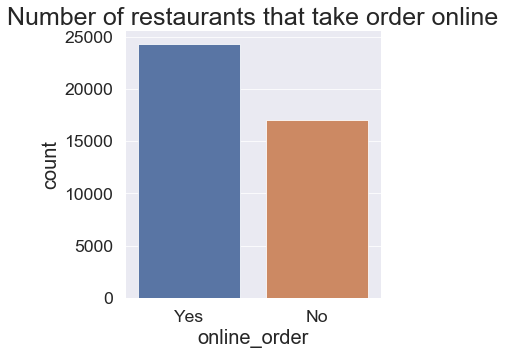

In [92]:
# plotting number of restaurtants that take online_order
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'online_order')
plt.title('Number of restaurants that take order online')
plt.show()

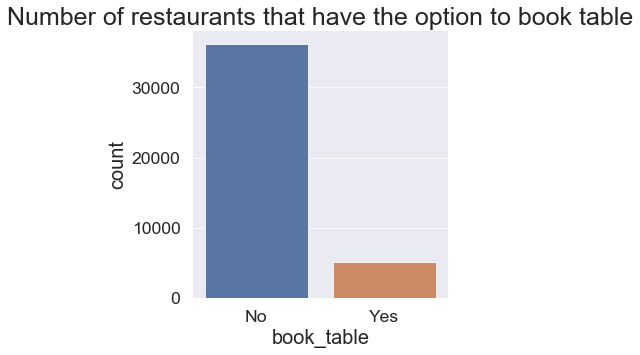

In [93]:
# plotting number of restaurants that have the option to book table
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'book_table')
plt.title('Number of restaurants that have the option to book table')
plt.show()

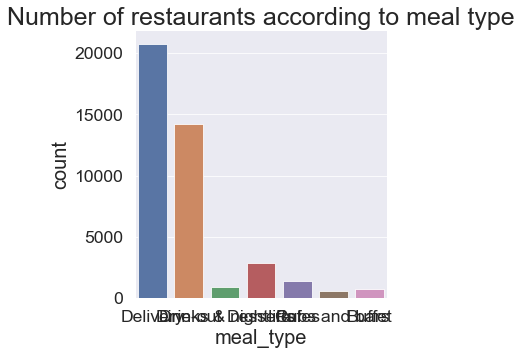

In [94]:
# plotting number of restaurants with meal type
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20,'figure.figsize':(20,10)})   
sns.catplot(data = df, kind = 'count', x = 'meal_type')
plt.title('Number of restaurants according to meal type')
plt.show()

<Figure size 1152x648 with 0 Axes>

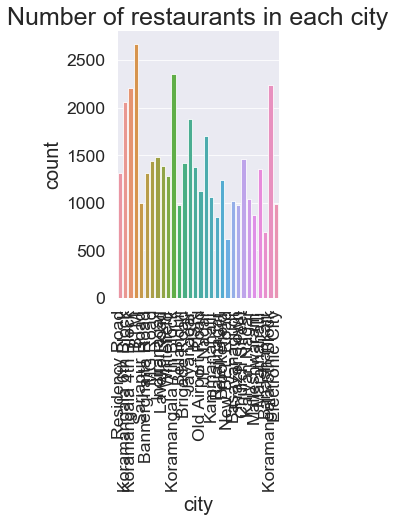

In [95]:
# plotting number of restaurants in each city
plt.figure(figsize=(16,9))
sns.set_context("paper", font_scale = 2, rc={"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'city')
plt.title('Number of restaurants in each city')
b.set_xticklabels(rotation = 90)
plt.show()

In [96]:
# tuning rate feature, converting '-' and 'NEW' to unrated
a = list(df['rates'])
for i in range(0, len(a)):
    if a[i] == 'nan':
        a[i] = 'unrated'
    elif a[i] == '-':
        a[i] = 'unrated'
    elif a[i] == 'NEW':
        a[i] = 'unrated'

In [97]:
df['rates'] = a

df['rates'].value_counts()

unrated    8037
3.9        1687
3.8        1622
3.7        1614
3.9        1497
           ... 
2.2           7
2.0           7
2.0           3
1.8           2
1.8           2
Name: rates, Length: 63, dtype: int64

In [98]:
df

name online_order book_table  votes  \
0             Al Swaad Take Away          Yes         No     13   
1              The Boozy Griffin           No        Yes   5015   
2                         Barkat           No         No      6   
3                       Sriracha           No         No    699   
4      Sri Ganesh Juice Junction          Yes         No    129   
...                          ...          ...        ...    ...   
41368                    Koshy's           No         No   2332   
41369           Midnight Special          Yes         No      0   
41370      Sholay - The Barbeque          Yes        Yes     45   
41371             Ghar Ka Bhojan           No         No      7   
41372                 Sree Sagar          Yes         No      0   

                rest_type                                         dish_liked  \
0             Quick Bites                                                NaN   
1      Casual Dining, Pub  Cocktails, Craft Beer, Salads, Devils Chicken,...   
2             Quick Bites                                                NaN   
3           Casual Dining  Noodles, Laksa, Cocktails, Dumplings, Sangria,...   
4           Beverage Shop                                                NaN   
...                   ...                                                ...   
41368       Casual Dining  Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...   
41369  Takeaway, Delivery                                                NaN   
41370       Casual Dining                                                NaN   
41371            Delivery                                                NaN   
41372         Quick Bites                                                NaN   

                                             cuisines avg_cost meal_type  \
0                 North Indian, South Indian, Arabian      350  Delivery   
1                               European, Continental    1,800  Dine-out   
2                                              Kerala      250  Dine-out   
3             Thai, Chinese, Indonesian, Asian, Momos    1,500  Dine-out   
4                                   Juices, Fast Food      150  Delivery   
...                                               ...      ...       ...   
41368  South Indian, North Indian, Chinese, Beverages      700  Dine-out   
41369                North Indian, Fast Food, Chinese      500  Delivery   
41370                               North Indian, BBQ    1,200  Dine-out   
41371                      North Indian, Healthy Food      200  Delivery   
41372                                    South Indian      200  Dine-out   

                        city    rates  
0             Residency Road     3.1   
1      Koramangala 6th Block     4.6   
2      Koramangala 4th Block     3.4   
3             Residency Road     4.3   
4      Koramangala 6th Block     3.7   
...                      ...      ...  
41368         Residency Road     3.8   
41369  Koramangala 4th Block  unrated  
41370           New BEL Road     3.5   
41371                MG Road     3.3   
41372           Basavanagudi  unrated  

[41373 rows x 11 columns]

In [99]:
a = list(df['rates'])
for i in range(0, len(a)):
    if a[i] == 'unrated':
        a[i] = None
    else :
        a[i] = float(a[i])
df['rates'] = a

In [100]:
df.head()

name online_order book_table  votes  \
0         Al Swaad Take Away          Yes         No     13   
1          The Boozy Griffin           No        Yes   5015   
2                     Barkat           No         No      6   
3                   Sriracha           No         No    699   
4  Sri Ganesh Juice Junction          Yes         No    129   

            rest_type                                         dish_liked  \
0         Quick Bites                                                NaN   
1  Casual Dining, Pub  Cocktails, Craft Beer, Salads, Devils Chicken,...   
2         Quick Bites                                                NaN   
3       Casual Dining  Noodles, Laksa, Cocktails, Dumplings, Sangria,...   
4       Beverage Shop                                                NaN   

                                  cuisines avg_cost meal_type  \
0      North Indian, South Indian, Arabian      350  Delivery   
1                    European, Continental    1,800  Dine-out   
2                                   Kerala      250  Dine-out   
3  Thai, Chinese, Indonesian, Asian, Momos    1,500  Dine-out   
4                        Juices, Fast Food      150  Delivery   

                    city  rates  
0         Residency Road    3.1  
1  Koramangala 6th Block    4.6  
2  Koramangala 4th Block    3.4  
3         Residency Road    4.3  
4  Koramangala 6th Block    3.7

In [101]:
df.tail()

name online_order book_table  votes  \
41368                Koshy's           No         No   2332   
41369       Midnight Special          Yes         No      0   
41370  Sholay - The Barbeque          Yes        Yes     45   
41371         Ghar Ka Bhojan           No         No      7   
41372             Sree Sagar          Yes         No      0   

                rest_type                                         dish_liked  \
41368       Casual Dining  Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...   
41369  Takeaway, Delivery                                                NaN   
41370       Casual Dining                                                NaN   
41371            Delivery                                                NaN   
41372         Quick Bites                                                NaN   

                                             cuisines avg_cost meal_type  \
41368  South Indian, North Indian, Chinese, Beverages      700  Dine-out   
41369                North Indian, Fast Food, Chinese      500  Delivery   
41370                               North Indian, BBQ    1,200  Dine-out   
41371                      North Indian, Healthy Food      200  Delivery   
41372                                    South Indian      200  Dine-out   

                        city  rates  
41368         Residency Road    3.8  
41369  Koramangala 4th Block    NaN  
41370           New BEL Road    3.5  
41371                MG Road    3.3  
41372           Basavanagudi    NaN

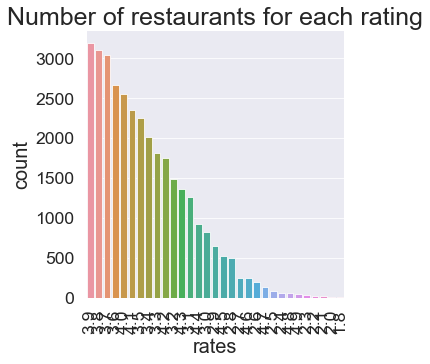

In [102]:
# Plotting the number of restaurants for each rating
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rates', order = df['rates'].value_counts().index)
plt.title('Number of restaurants for each rating')
b.set_xticklabels(rotation = 90)
plt.show()

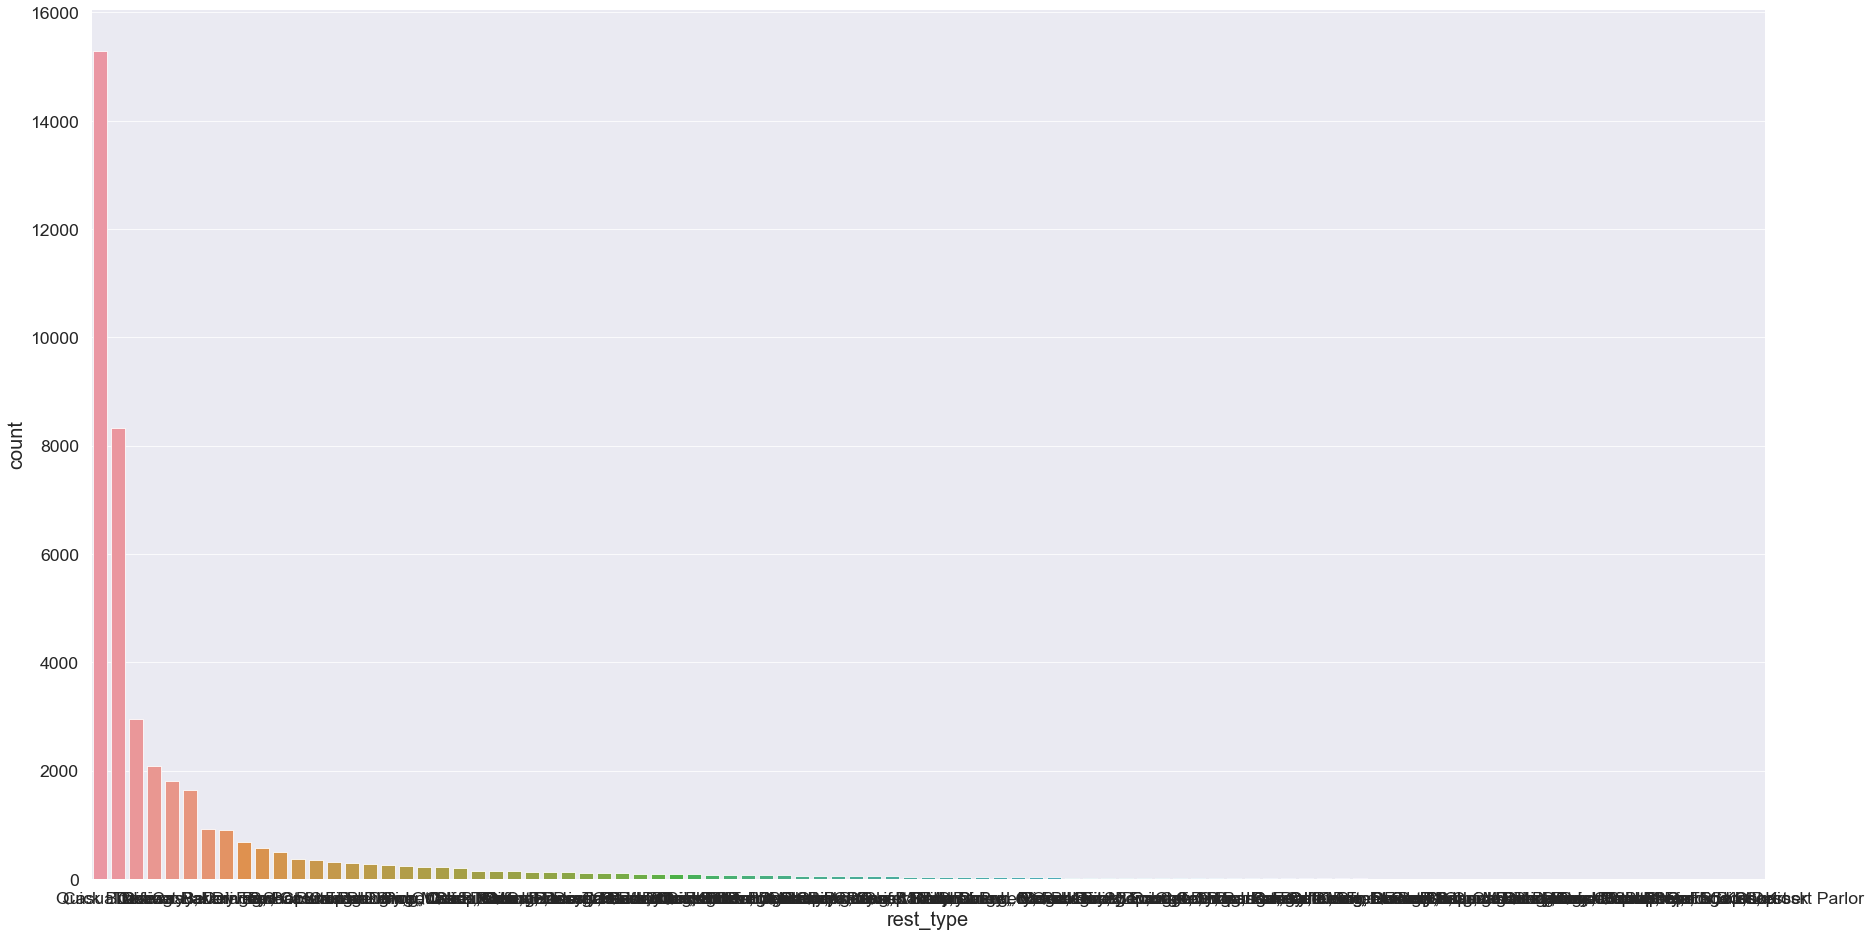

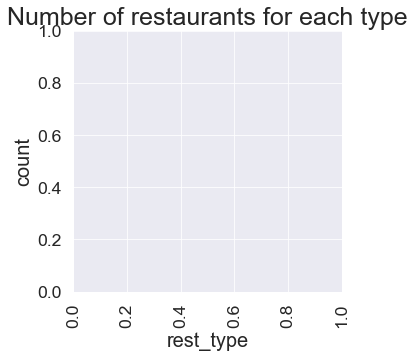

In [103]:
# Plotting count plot of rest_type
fig_dims = (30, 16)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rest_type', order = df['rest_type'].value_counts().index,ax=ax)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation = 90)
plt.show()


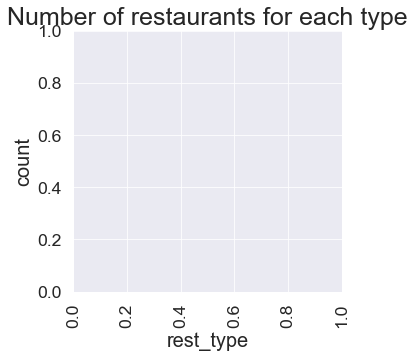

In [104]:

# count plot of top 10
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rest_type', order = df['rest_type'].value_counts().head(10).index,ax=ax)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation = 90)
plt.show()


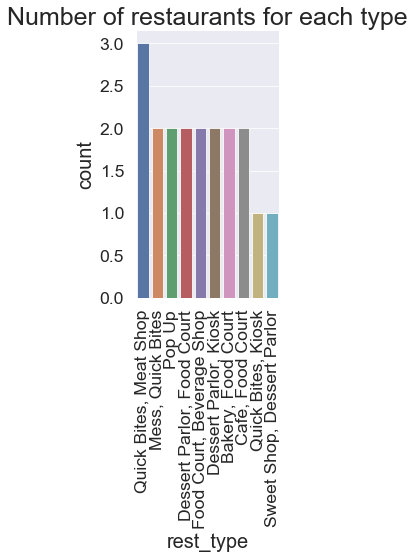

In [105]:
# count plot of type last 10
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rest_type', order = df['rest_type'].value_counts().tail(10).index)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation = 90)
plt.show()


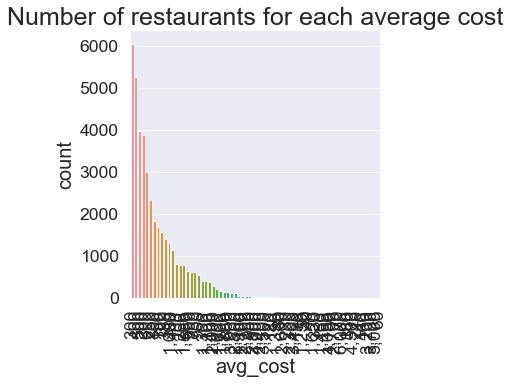

In [106]:
# plotting count plot for avg_cost
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'avg_cost', order = df['avg_cost'].value_counts().index)
plt.title('Number of restaurants for each average cost')
b.set_xticklabels(rotation = 90)
plt.show()
# This is done to see the competition


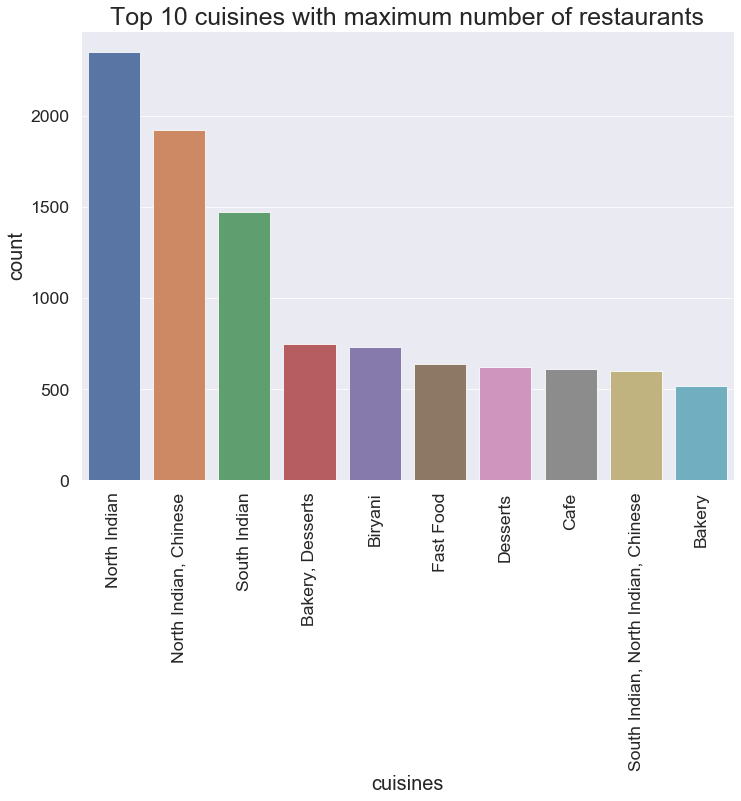

In [107]:

# count plot of cuisines
b = sns.countplot(data = df, x = 'cuisines', order = df.cuisines.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 cuisines with maximum number of restaurants')
plt.show()


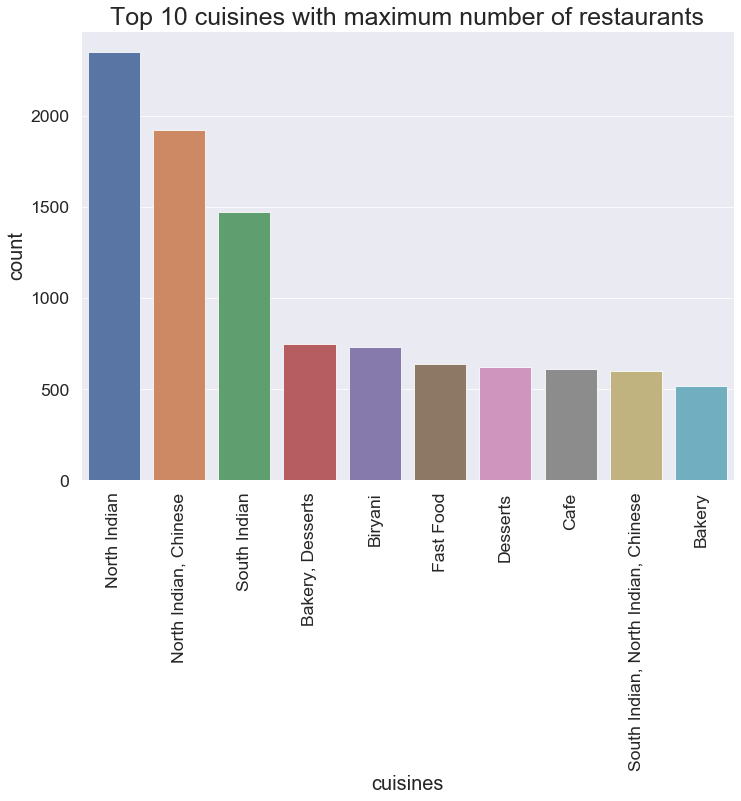

In [108]:

# count plot of top 10 cuisines
b = sns.countplot(data = df, x = 'cuisines', order = df.cuisines.value_counts().head(10).iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 cuisines with maximum number of restaurants')
plt.show()


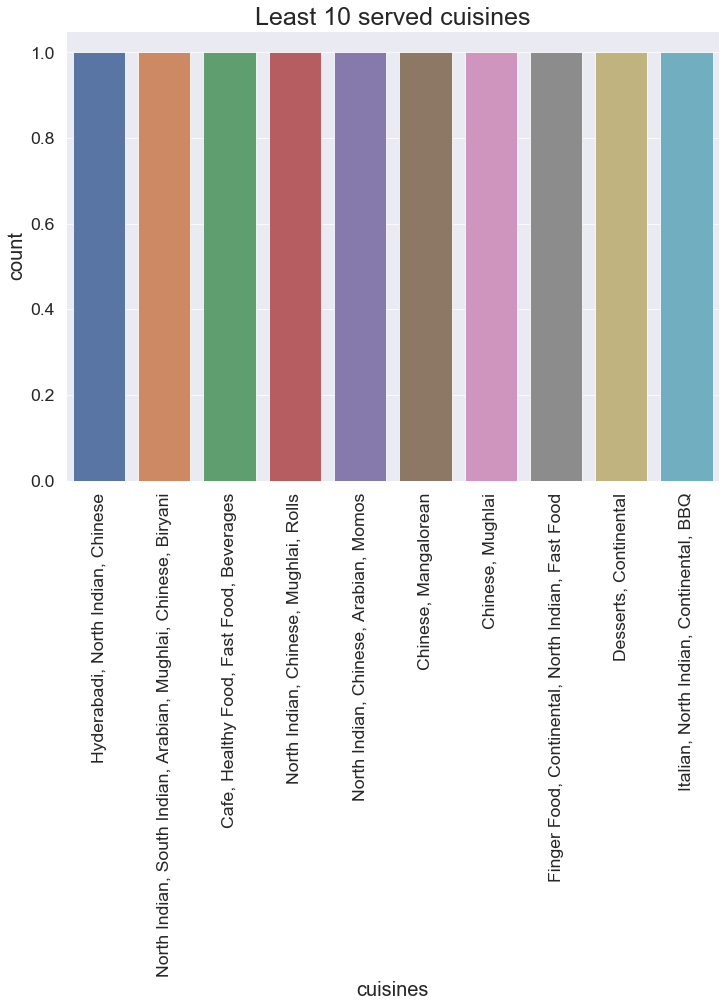

In [109]:

# count plot of last 10 cuisines
b = sns.countplot(data = df, x = 'cuisines', order = df.cuisines.value_counts().tail(10).iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Least 10 served cuisines')
plt.show()


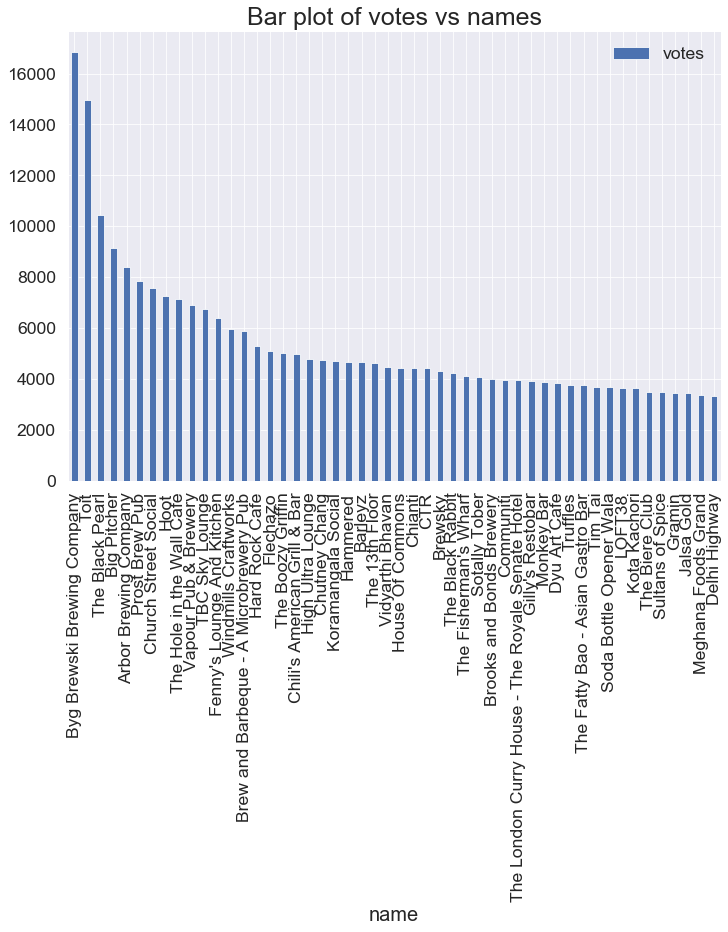

In [110]:

# Bar plot of first 50 restaurants as per votes
df[['votes', 'name']].groupby(['name']).median().sort_values("votes", ascending = False).head(50).plot.bar()
plt.title('Bar plot of votes vs names')
plt.show()

In [111]:
# finding the details of the most voted restaurant
b=[]
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i][0] == 'Byg Brewski Brewing Company' or a[i][0] == 'Byg Brewski Brewing Company ' or a[i][0] == ' Byg Brewski Brewing Company':
        b.append(list(a[i]))

b = pd.DataFrame(b)
b.columns = df.columns

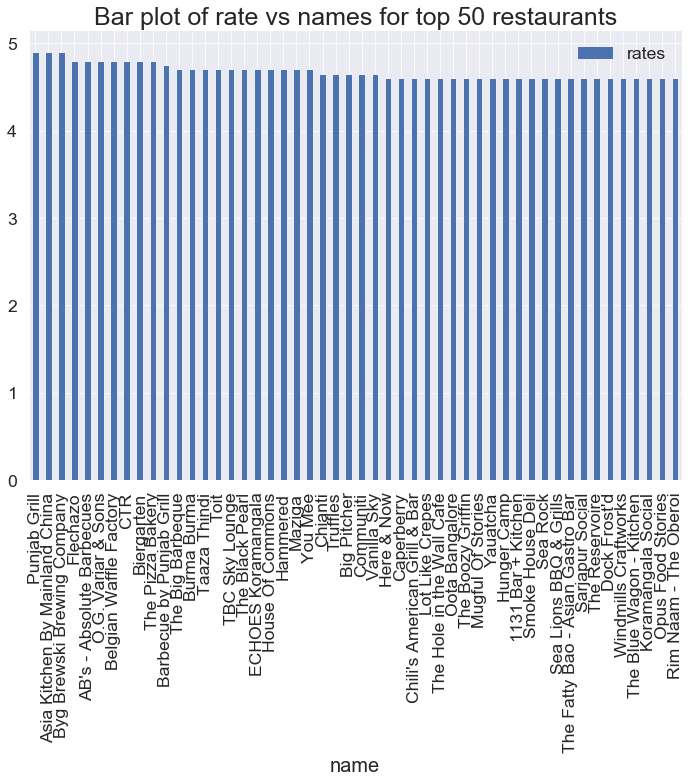

In [112]:
# bar plot of restaurants vs rate for first 50
df[['rates', 'name']].groupby(['name']).median().sort_values("rates", ascending = False).head(50).plot.bar()
plt.title('Bar plot of rate vs names for top 50 restaurants')
plt.show()

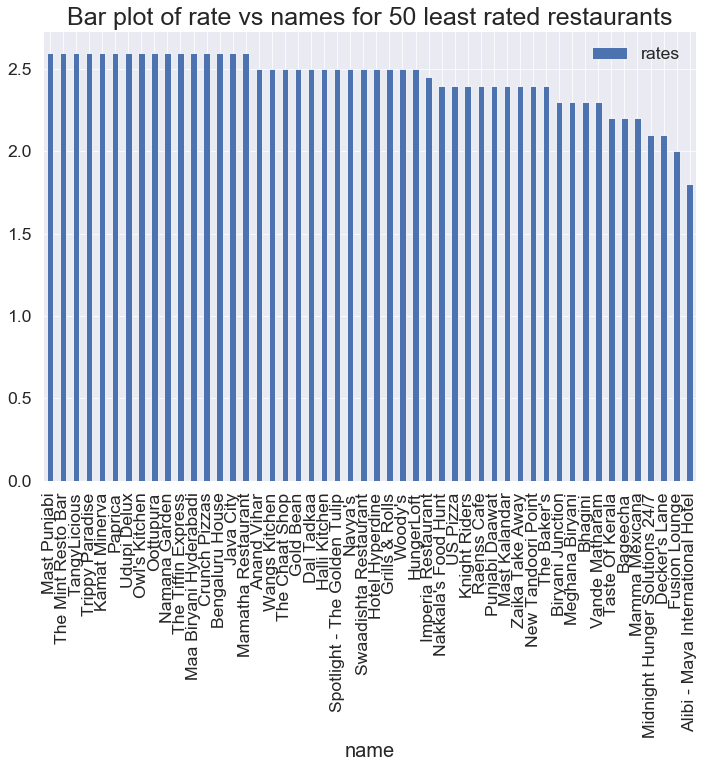

In [113]:
# bar plot of last 50 restaurants as per rate
#a = a[0: len(a)-1]
a = pd.DataFrame(df['rates'])
a['name'] = df['name']
a = a.dropna(axis = 0, how ='any')
a[['rates', 'name']].groupby(['name']).median().sort_values("rates", ascending = False).tail(50).plot.bar()
plt.title('Bar plot of rate vs names for 50 least rated restaurants')
plt.show()

In [114]:
# removing ',' character from values in avg_cost feature
df['avg_cost'] = df['avg_cost'].apply(lambda x: str(x).replace(',',''))
a = list(df['avg_cost'])
for i in range(0, len(a)):
    if a[i] != 'nan':
        a[i] = int(a[i])
    else:
        a[i] = None
df['avg_cost'] = a


C:\Users\reddy\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reddy\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reddy\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\reddy\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


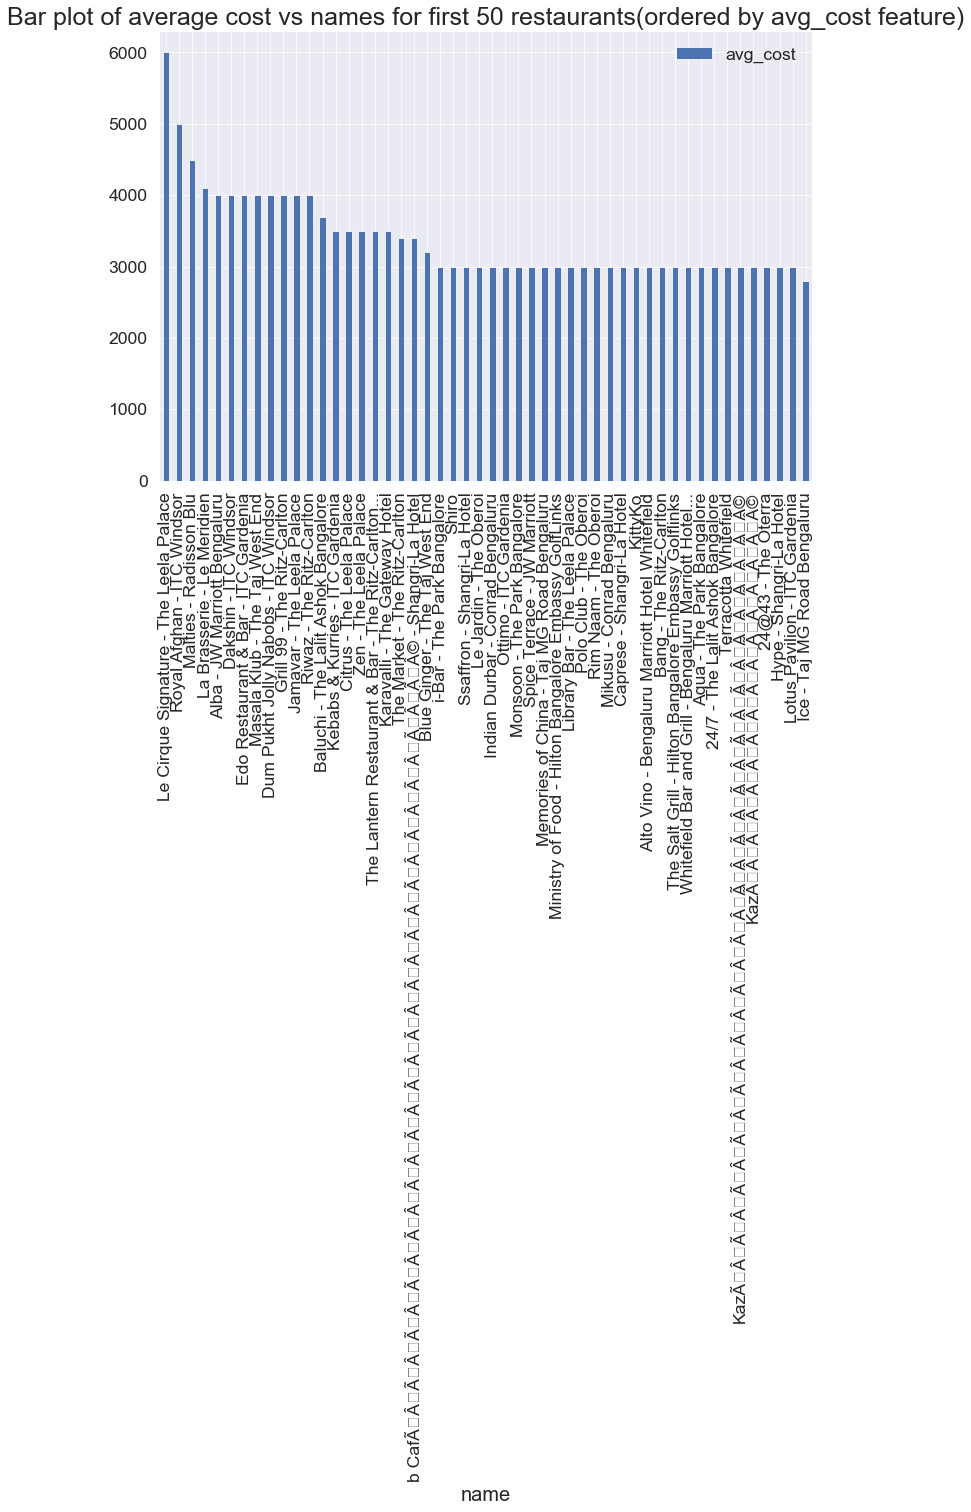

In [115]:
# plotting barplot for name vs average cost for first 50
df[['avg_cost', 'name']].groupby(['name']).median().sort_values("avg_cost", ascending = False).head(50).plot.bar()
plt.title('Bar plot of average cost vs names for first 50 restaurants(ordered by avg_cost feature)')
plt.show()

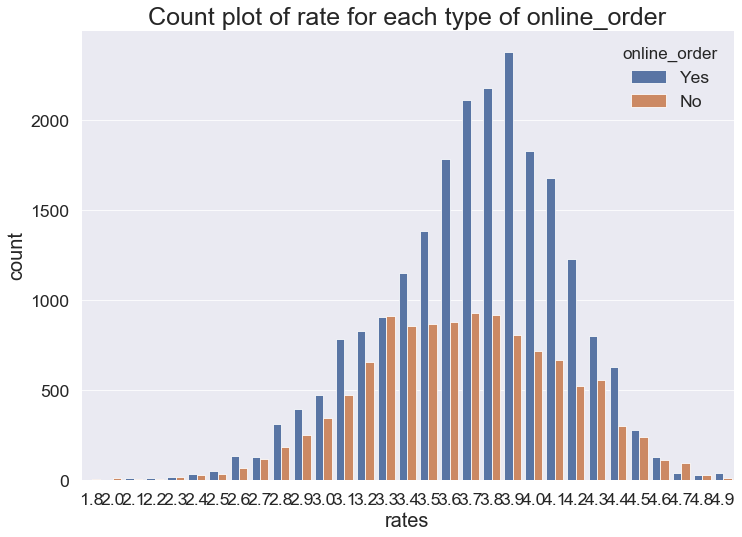

In [116]:
# count plot of rate with hue = online_order
sns.countplot(data = df, hue = 'online_order', x = 'rates')
plt.title('Count plot of rate for each type of online_order')
plt.show()

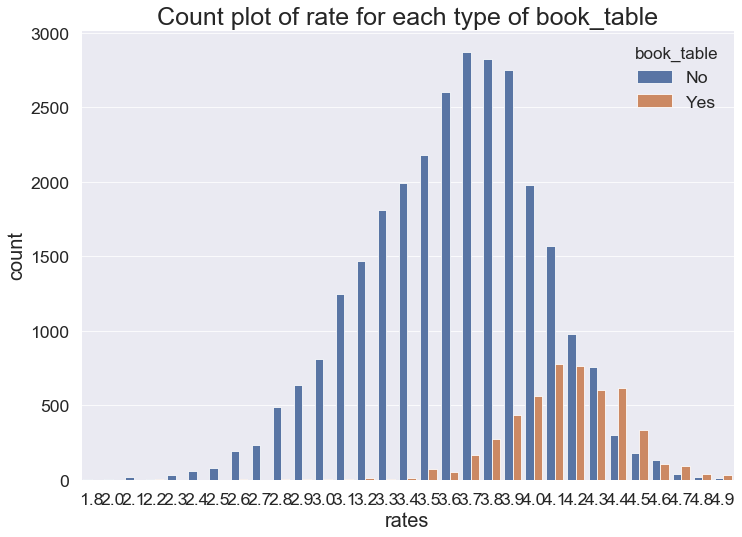

In [117]:
# count plot of rate with hue = book_table
sns.countplot(data = df, hue = 'book_table', x = 'rates')
plt.title('Count plot of rate for each type of book_table')
plt.show()

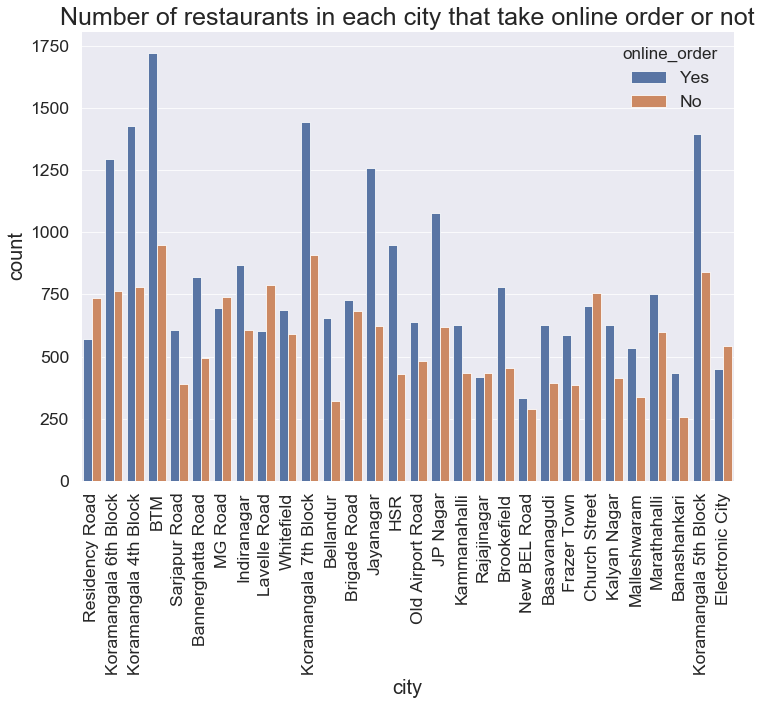

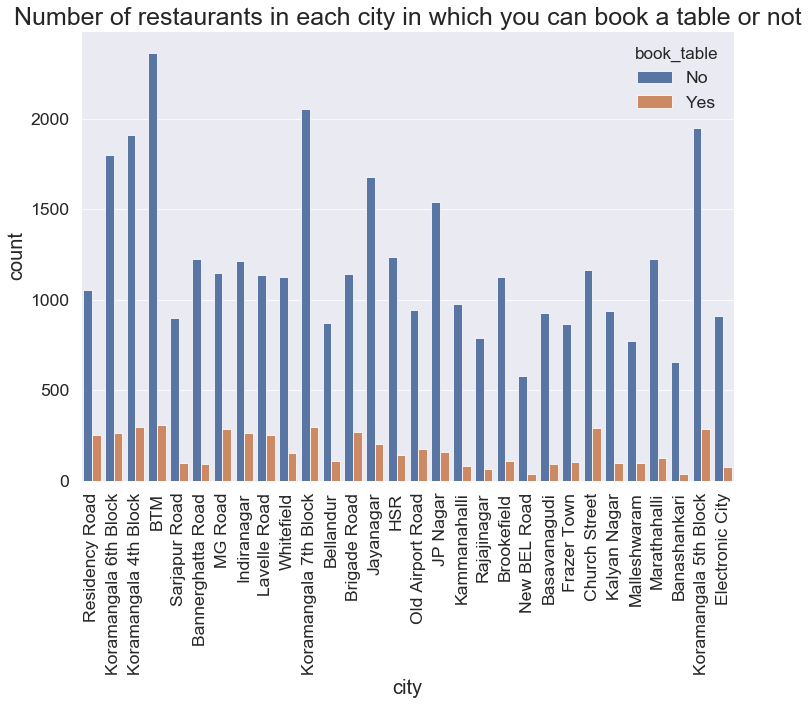

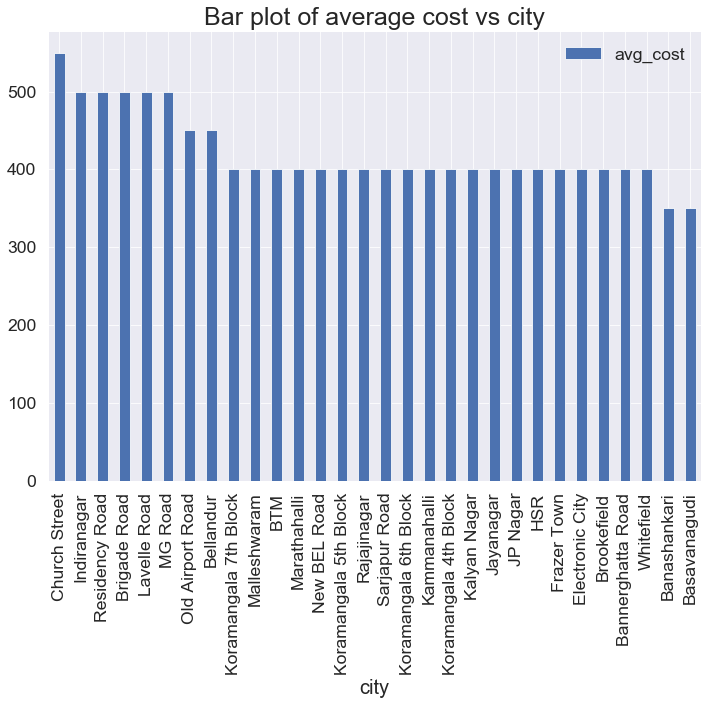

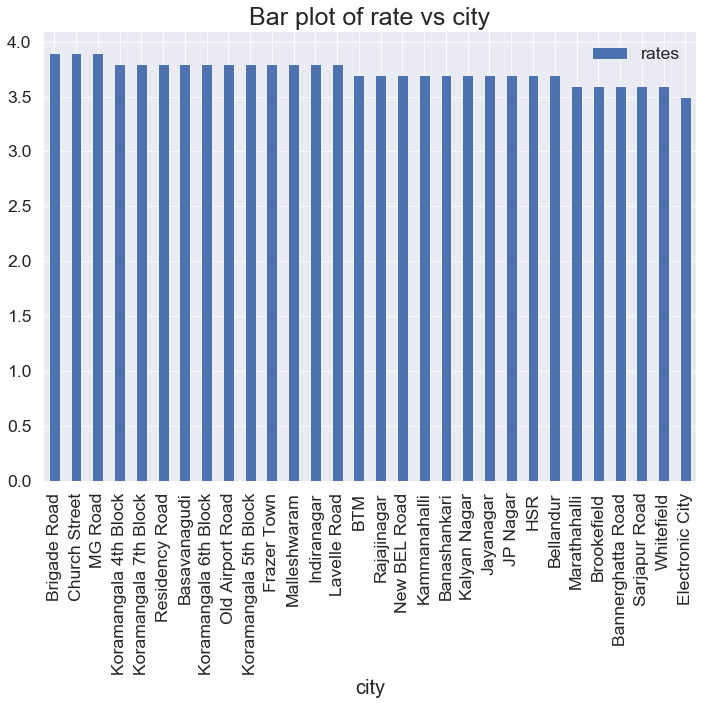

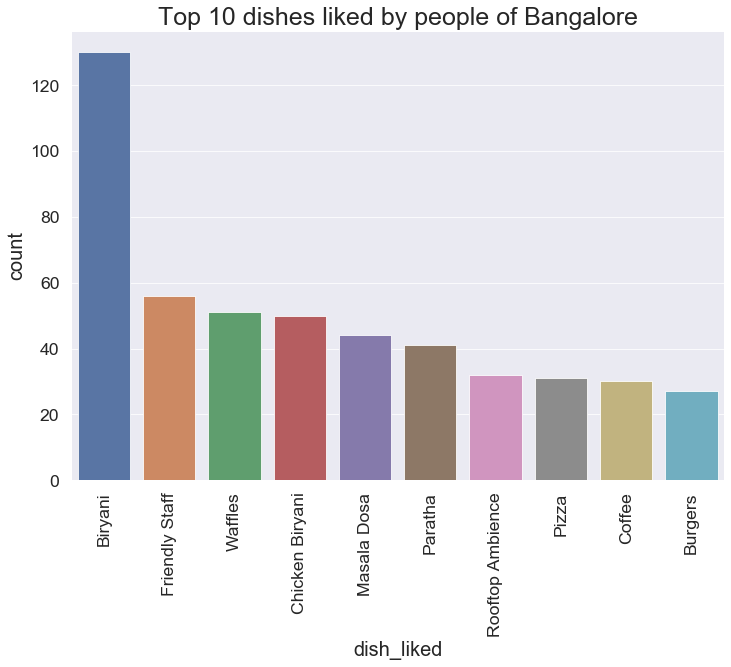

In [118]:
# count plot of restaurants per city with hue = online_order
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.countplot(data = df, x = 'city', hue = 'online_order')
plt.title('Number of restaurants in each city that take online order or not')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.show()

# count plot of restaurants per city with hue = book_table
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.countplot(data = df, x = 'city', hue = 'book_table')
plt.title('Number of restaurants in each city in which you can book a table or not')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.show()

# plotting barplot for city vs average cost
df[['avg_cost', 'city']].groupby(['city']).median().sort_values("avg_cost", ascending = False).plot.bar()
plt.title('Bar plot of average cost vs city')
plt.show()
# Which city is costly to eat

# plotting barplot for city vs rate
# to find out which city is high rated or least rated
df[['rates', 'city']].groupby(['city']).median().sort_values("rates", ascending = False).plot.bar()
plt.title('Bar plot of rate vs city')
plt.show()

# plotting the top 10 dishes liked by people 
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i, 6] == 'Friendly Staff':
        print(a[i, 6])
        a[i, 6] = None

a = pd.DataFrame(a)
a.columns = df.columns

sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
b = sns.countplot(data = a, x = 'dish_liked', order = a.dish_liked.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 dishes liked by people of Bangalore')
plt.show()

In [119]:
df

name online_order book_table  votes  \
0             Al Swaad Take Away          Yes         No     13   
1              The Boozy Griffin           No        Yes   5015   
2                         Barkat           No         No      6   
3                       Sriracha           No         No    699   
4      Sri Ganesh Juice Junction          Yes         No    129   
...                          ...          ...        ...    ...   
41368                    Koshy's           No         No   2332   
41369           Midnight Special          Yes         No      0   
41370      Sholay - The Barbeque          Yes        Yes     45   
41371             Ghar Ka Bhojan           No         No      7   
41372                 Sree Sagar          Yes         No      0   

                rest_type                                         dish_liked  \
0             Quick Bites                                                NaN   
1      Casual Dining, Pub  Cocktails, Craft Beer, Salads, Devils Chicken,...   
2             Quick Bites                                                NaN   
3           Casual Dining  Noodles, Laksa, Cocktails, Dumplings, Sangria,...   
4           Beverage Shop                                                NaN   
...                   ...                                                ...   
41368       Casual Dining  Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...   
41369  Takeaway, Delivery                                                NaN   
41370       Casual Dining                                                NaN   
41371            Delivery                                                NaN   
41372         Quick Bites                                                NaN   

                                             cuisines  avg_cost meal_type  \
0                 North Indian, South Indian, Arabian     350.0  Delivery   
1                               European, Continental    1800.0  Dine-out   
2                                              Kerala     250.0  Dine-out   
3             Thai, Chinese, Indonesian, Asian, Momos    1500.0  Dine-out   
4                                   Juices, Fast Food     150.0  Delivery   
...                                               ...       ...       ...   
41368  South Indian, North Indian, Chinese, Beverages     700.0  Dine-out   
41369                North Indian, Fast Food, Chinese     500.0  Delivery   
41370                               North Indian, BBQ    1200.0  Dine-out   
41371                      North Indian, Healthy Food     200.0  Delivery   
41372                                    South Indian     200.0  Dine-out   

                        city  rates  
0             Residency Road    3.1  
1      Koramangala 6th Block    4.6  
2      Koramangala 4th Block    3.4  
3             Residency Road    4.3  
4      Koramangala 6th Block    3.7  
...                      ...    ...  
41368         Residency Road    3.8  
41369  Koramangala 4th Block    NaN  
41370           New BEL Road    3.5  
41371                MG Road    3.3  
41372           Basavanagudi    NaN  

[41373 rows x 11 columns]

In [120]:
X_Data = df[['online_order','book_table','votes','city']]
Y_data = df['rates']

In [121]:
X_Data.head()

online_order book_table  votes                   city
0          Yes         No     13         Residency Road
1           No        Yes   5015  Koramangala 6th Block
2           No         No      6  Koramangala 4th Block
3           No         No    699         Residency Road
4          Yes         No    129  Koramangala 6th Block

In [122]:
X_Data.isnull().sum()

online_order    0
book_table      0
votes           0
city            0
dtype: int64

In [123]:
X_Data.shape

(41373, 4)

In [124]:
Y_data.head()

0    3.1
1    4.6
2    3.4
3    4.3
4    3.7
Name: rates, dtype: float64

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le = LabelEncoder()

In [127]:
X_Data.dtypes

online_order    object
book_table      object
votes            int64
city            object
dtype: object

In [128]:
X_Data.columns

Index(['online_order', 'book_table', 'votes', 'city'], dtype='object')

In [129]:
li =['online_order','book_table','city']
for i in li:
    X_Data[i] = le.fit_transform(X_Data[i])
X_Data.head()

c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


online_order  book_table  votes  city
0             1           0     13    27
1             0           1   5015    18
2             0           0      6    16
3             0           0    699    27
4             1           0    129    18

In [130]:
X_Data.isnull().sum()

online_order    0
book_table      0
votes           0
city            0
dtype: int64

In [131]:
Y_data.head()

0    3.1
1    4.6
2    3.4
3    4.3
4    3.7
Name: rates, dtype: float64

In [132]:
Y_data.isnull().sum()

8037

In [133]:
X_Data.shape

(41373, 4)

In [134]:
Y_data.shape

(41373,)

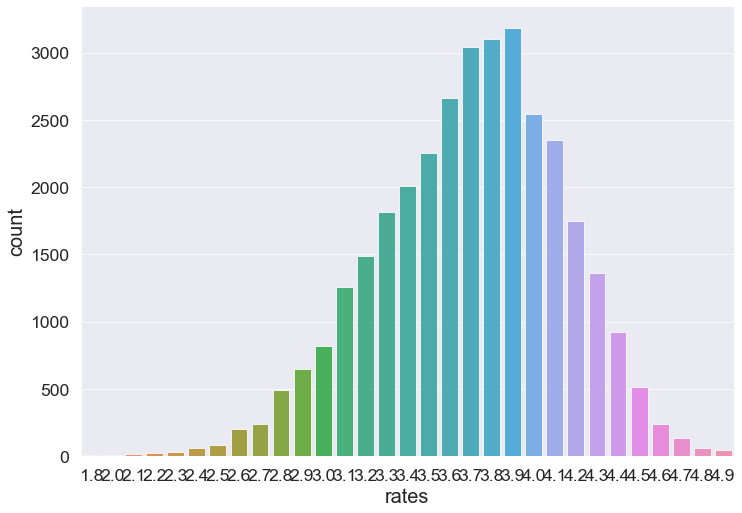

In [135]:
sns.countplot(Y_data)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
df

name online_order book_table  votes  \
0             Al Swaad Take Away          Yes         No     13   
1              The Boozy Griffin           No        Yes   5015   
2                         Barkat           No         No      6   
3                       Sriracha           No         No    699   
4      Sri Ganesh Juice Junction          Yes         No    129   
...                          ...          ...        ...    ...   
41368                    Koshy's           No         No   2332   
41369           Midnight Special          Yes         No      0   
41370      Sholay - The Barbeque          Yes        Yes     45   
41371             Ghar Ka Bhojan           No         No      7   
41372                 Sree Sagar          Yes         No      0   

                rest_type                                         dish_liked  \
0             Quick Bites                                                NaN   
1      Casual Dining, Pub  Cocktails, Craft Beer, Salads, Devils Chicken,...   
2             Quick Bites                                                NaN   
3           Casual Dining  Noodles, Laksa, Cocktails, Dumplings, Sangria,...   
4           Beverage Shop                                                NaN   
...                   ...                                                ...   
41368       Casual Dining  Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...   
41369  Takeaway, Delivery                                                NaN   
41370       Casual Dining                                                NaN   
41371            Delivery                                                NaN   
41372         Quick Bites                                                NaN   

                                             cuisines  avg_cost meal_type  \
0                 North Indian, South Indian, Arabian     350.0  Delivery   
1                               European, Continental    1800.0  Dine-out   
2                                              Kerala     250.0  Dine-out   
3             Thai, Chinese, Indonesian, Asian, Momos    1500.0  Dine-out   
4                                   Juices, Fast Food     150.0  Delivery   
...                                               ...       ...       ...   
41368  South Indian, North Indian, Chinese, Beverages     700.0  Dine-out   
41369                North Indian, Fast Food, Chinese     500.0  Delivery   
41370                               North Indian, BBQ    1200.0  Dine-out   
41371                      North Indian, Healthy Food     200.0  Delivery   
41372                                    South Indian     200.0  Dine-out   

                        city  rates  
0             Residency Road    3.1  
1      Koramangala 6th Block    4.6  
2      Koramangala 4th Block    3.4  
3             Residency Road    4.3  
4      Koramangala 6th Block    3.7  
...                      ...    ...  
41368         Residency Road    3.8  
41369  Koramangala 4th Block    NaN  
41370           New BEL Road    3.5  
41371                MG Road    3.3  
41372           Basavanagudi    NaN  

[41373 rows x 11 columns]

In [138]:
df.dropna(how = 'any',inplace=True)

In [139]:
df

name online_order book_table  votes  \
1           The Boozy Griffin           No        Yes   5015   
3                    Sriracha           No         No    699   
7         Chez Nous - Novotel           No        Yes    125   
8                   Maxpresso           No         No    324   
9      Hyderabadi Biryani Hub          Yes         No    218   
...                       ...          ...        ...    ...   
41350               MealsTree          Yes         No    163   
41357             NYS Kitchen          Yes         No     25   
41359      Mani's Dum Biryani          Yes         No    175   
41360   Blue Berry Restaurant          Yes         No    150   
41368                 Koshy's           No         No   2332   

                rest_type                                         dish_liked  \
1      Casual Dining, Pub  Cocktails, Craft Beer, Salads, Devils Chicken,...   
3           Casual Dining  Noodles, Laksa, Cocktails, Dumplings, Sangria,...   
7                  Lounge  Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...   
8                    Cafe  Burgers, Coffee, Waffles, Mocktails, Pasta, Br...   
9           Casual Dining                                     Biryani, Raita   
...                   ...                                                ...   
41350            Delivery                                         Chana Daal   
41357         Quick Bites                                              Pasta   
41359       Casual Dining          Chicken Biryani, Vegetable Biryani, Raita   
41360       Casual Dining  Tandoori Chicken, Coffee, Butter Chicken, Fish...   
41368       Casual Dining  Coffee, Kulfi, Beef Steak, Chocolate Shake, Sa...   

                                             cuisines  avg_cost meal_type  \
1                               European, Continental    1800.0  Dine-out   
3             Thai, Chinese, Indonesian, Asian, Momos    1500.0  Dine-out   
7                      European, French, North Indian    2500.0  Dine-out   
8                  Cafe, American, Italian, Beverages     700.0  Delivery   
9                      Biryani, North Indian, Chinese     600.0  Delivery   
...                                               ...       ...       ...   
41350                                    North Indian     400.0  Delivery   
41357                           North Indian, Chinese     500.0  Dine-out   
41359                                  Biryani, Kebab     750.0  Dine-out   
41360       North Indian, Biryani, Chinese, Beverages     650.0  Delivery   
41368  South Indian, North Indian, Chinese, Beverages     700.0  Dine-out   

                        city  rates  
1      Koramangala 6th Block    4.6  
3             Residency Road    4.3  
7              Sarjapur Road    3.9  
8      Koramangala 4th Block    4.1  
9                        BTM    3.6  
...                      ...    ...  
41350           Marathahalli    3.7  
41357            Brookefield    3.7  
41359          Church Street    4.0  
41360          Sarjapur Road    3.9  
41368         Residency Road    3.8  

[18592 rows x 11 columns]

In [140]:
df.isnull().sum()

name            0
online_order    0
book_table      0
votes           0
rest_type       0
dish_liked      0
cuisines        0
avg_cost        0
meal_type       0
city            0
rates           0
dtype: int64

In [141]:
df.dtypes

name             object
online_order     object
book_table       object
votes             int64
rest_type        object
dish_liked       object
cuisines         object
avg_cost        float64
meal_type        object
city             object
rates           float64
dtype: object

In [142]:
X_data = df[['online_order','book_table','votes','city','rest_type','cuisines','avg_cost']]
Y_data = df['rates']

In [143]:
li =['online_order','book_table','votes','city','rest_type','cuisines','avg_cost']
for i in li:
    X_data[i] = le.fit_transform(X_data[i])
X_data.head()

c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


online_order  book_table  votes  city  rest_type  cuisines  avg_cost
1             0           1   2062    18         26       789        36
3             0           0    672    27         20      1629        32
7             0           1    104    28         46       792        43
8             0           0    303    16         13       335        17
9             1           0    197     0         20       279        15

In [144]:
Y_data.head()

1    4.6
3    4.3
7    3.9
8    4.1
9    3.6
Name: rates, dtype: float64

#### Data Transformation

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [146]:
ss = StandardScaler()

In [147]:
Scaling_Data = ['votes','city','rest_type','cuisines','avg_cost']

In [195]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.12,random_state= 1)

In [196]:
X_train.shape

(16360, 7)

In [197]:
Y_train.shape

(16360,)

In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
LR = LinearRegression()

In [200]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
LR.score(X_test,Y_test)

0.2572095762695259

In [202]:
LR.score(X_train,Y_train)

0.2550187987200816

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
Rf = RandomForestRegressor(n_estimators=50)

In [205]:
Rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [206]:
Rf.score(X_train,Y_train)

0.9811859365395588

In [207]:
Rf.score(X_test,Y_test)

0.8841204691454824